Ahmad Raza

21i-1714

DS-B

Data Mining Lab

Lab 3

            --  Task 1 --

In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# Load the dataset
bread_basket_df = pd.read_csv('bread basket.csv')

In [38]:
#1️ Check for missing values and drop them if necessary
bread_basket_df.dropna(inplace=True)

#2️ Remove duplicate rows if they exist
bread_basket_df.drop_duplicates(inplace=True)

#3️ Convert 'date_time' column to datetime format
bread_basket_df['date_time'] = pd.to_datetime(bread_basket_df['date_time'], format='%d-%m-%Y %H:%M', errors='coerce')

# Drop rows where 'date_time' could not be converted
bread_basket_df = bread_basket_df.dropna(subset=['date_time'])

# 4 Normalize the 'Item' names (convert to lowercase for consistency)
bread_basket_df['Item'] = bread_basket_df['Item'].str.lower()

In [39]:
# Convert 'date_time' column to datetime format
bread_basket_df['date_time'] = pd.to_datetime(bread_basket_df['date_time'], format='%d-%m-%Y %H:%M')

In [40]:
# Extract new columns
bread_basket_df['date'] = bread_basket_df['date_time'].dt.date
bread_basket_df['time'] = bread_basket_df['date_time'].dt.time
bread_basket_df['month'] = bread_basket_df['date_time'].dt.month
bread_basket_df['hour'] = bread_basket_df['date_time'].dt.hour
bread_basket_df['weekday'] = bread_basket_df['date_time'].dt.weekday

In [41]:
# Extract 'hour_span'
bread_basket_df['hour_span'] = bread_basket_df['hour'].astype(str) + '-' + (bread_basket_df['hour'] + 1).astype(str)

In [42]:
# Replace month numbers with names
bread_basket_df['month'] = bread_basket_df['month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

In [43]:
# Replace weekday numbers with names
bread_basket_df['weekday'] = bread_basket_df['weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

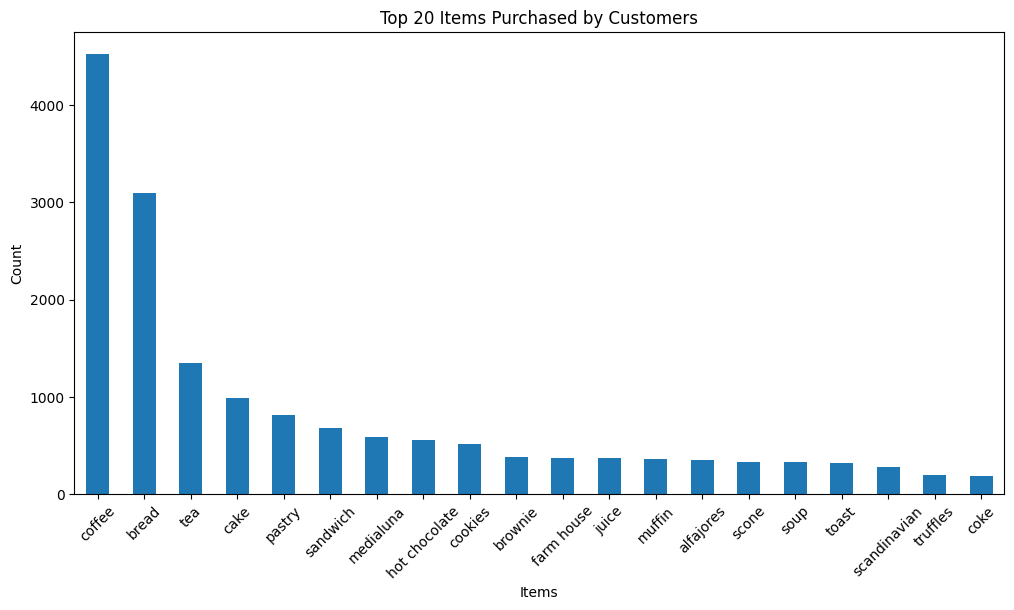

In [44]:
#Task 8: Top 20 Items Purchased
top_items = bread_basket_df['Item'].value_counts().head(20)
plt.figure(figsize=(12,6))
top_items.plot(kind='bar')
plt.title("Top 20 Items Purchased by Customers")
plt.xlabel("Items")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

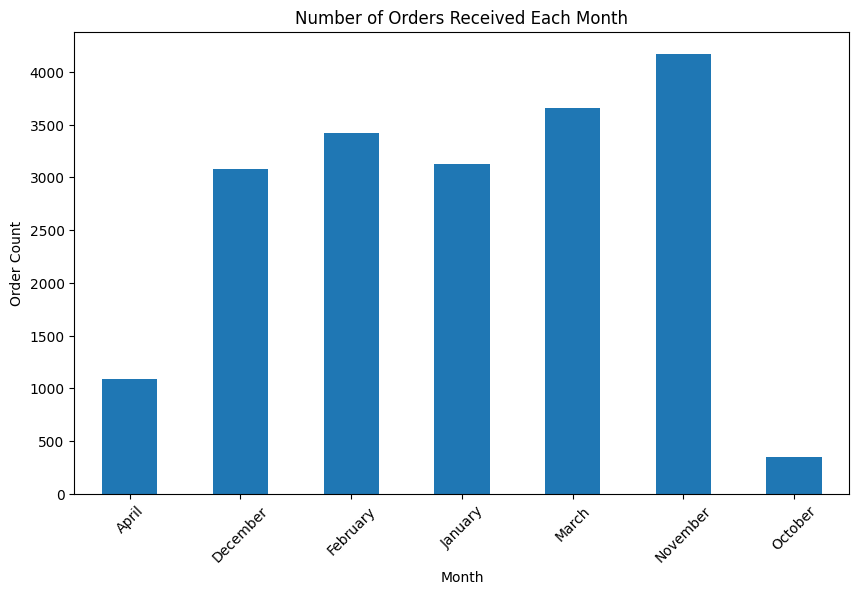

In [45]:
# Task 9: Number of Orders Received Each Month
orders_per_month = bread_basket_df['month'].value_counts().sort_index()
plt.figure(figsize=(10,6))
orders_per_month.plot(kind='bar')
plt.title("Number of Orders Received Each Month")
plt.xlabel("Month")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()

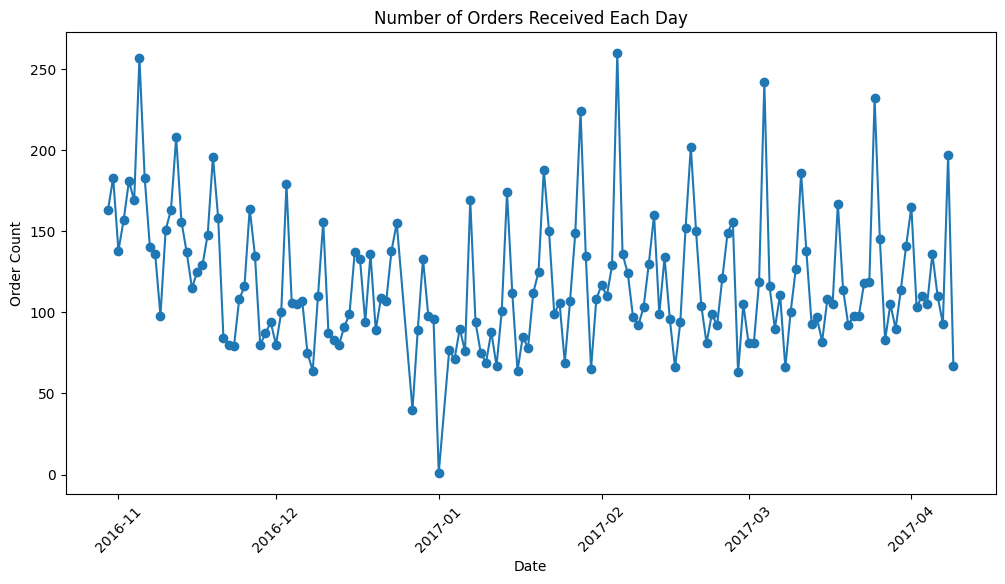

In [46]:
# Task 10: Number of Orders Received Each Day
orders_per_day = bread_basket_df['date'].value_counts().sort_index()
plt.figure(figsize=(12,6))
orders_per_day.plot(kind='line', marker='o', linestyle='-')
plt.title("Number of Orders Received Each Day")
plt.xlabel("Date")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()

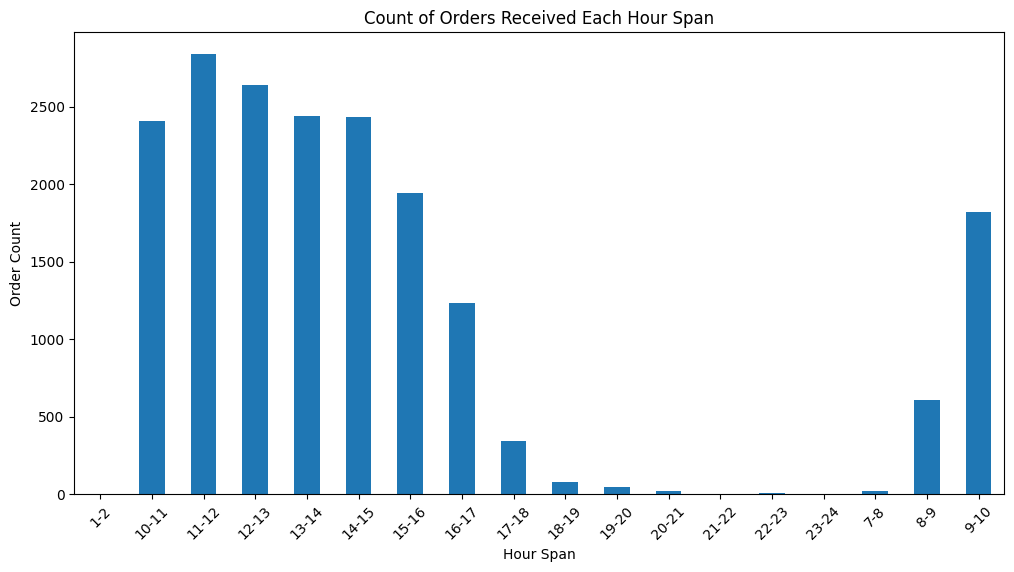

In [47]:
# Task 11: Count of Orders Received Each Hour Span
orders_per_hour_span = bread_basket_df['hour_span'].value_counts().sort_index()
plt.figure(figsize=(12,6))
orders_per_hour_span.plot(kind='bar')
plt.title("Count of Orders Received Each Hour Span")
plt.xlabel("Hour Span")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()


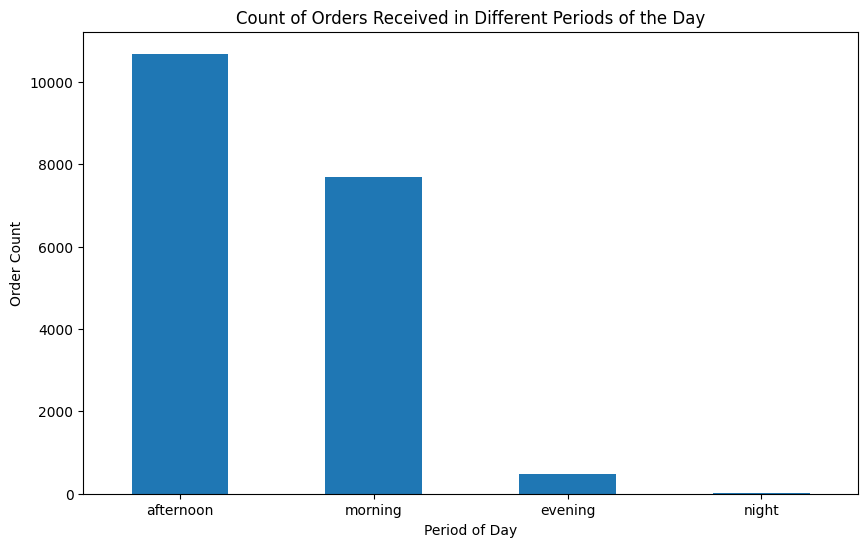

In [48]:
# Task 12: Count of Orders Received in Different Periods of the Day
orders_per_period = bread_basket_df['period_day'].value_counts()
plt.figure(figsize=(10,6))
orders_per_period.plot(kind='bar')
plt.title("Count of Orders Received in Different Periods of the Day")
plt.xlabel("Period of Day")
plt.ylabel("Order Count")
plt.xticks(rotation=0)
plt.show()

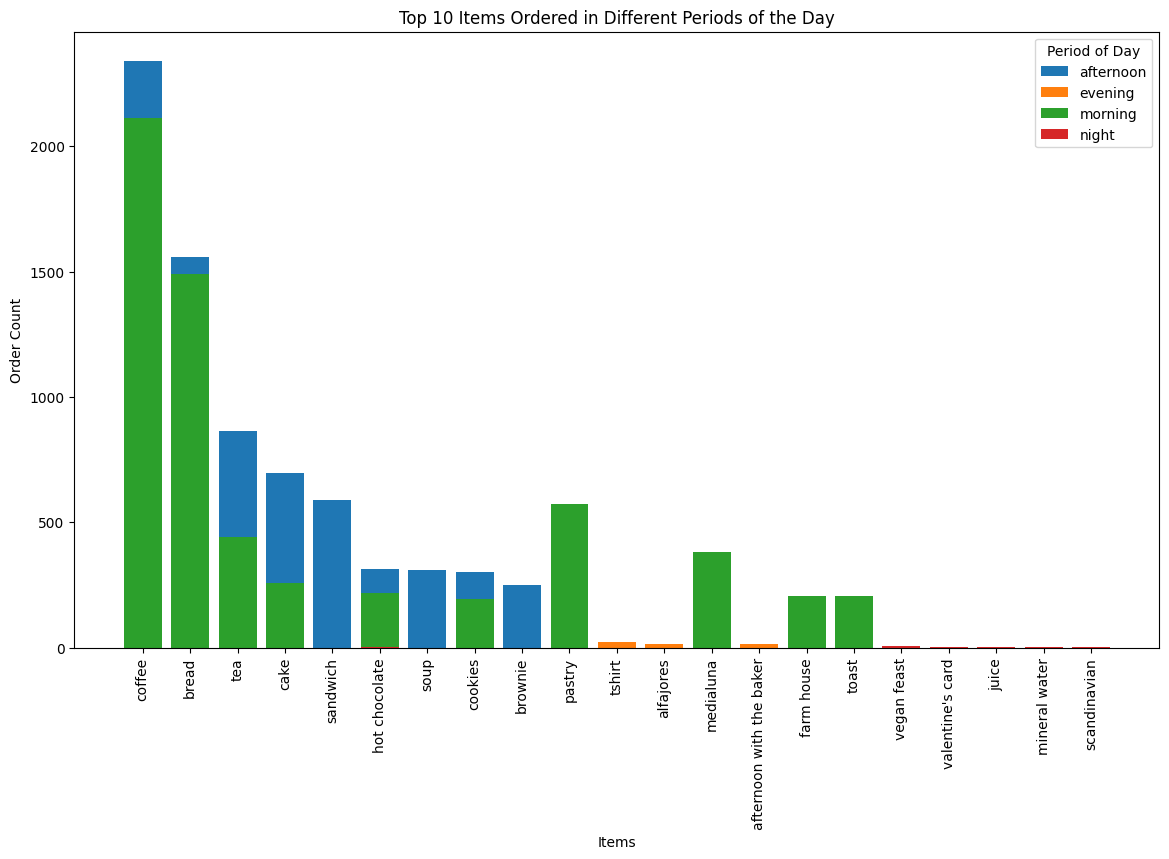

In [49]:
# Task 13: Top 10 Items Ordered in Different Periods of the Day
top_items_period = bread_basket_df.groupby(['period_day', 'Item']).size().reset_index(name='count')
top_items_period = top_items_period.sort_values(['period_day', 'count'], ascending=[True, False])
top_10_items_period = top_items_period.groupby('period_day').head(10)

# Plot
plt.figure(figsize=(14, 8))
for period in top_10_items_period['period_day'].unique():
    subset = top_10_items_period[top_10_items_period['period_day'] == period]
    plt.bar(subset['Item'], subset['count'], label=period)

plt.title("Top 10 Items Ordered in Different Periods of the Day")
plt.xlabel("Items")
plt.ylabel("Order Count")
plt.xticks(rotation=90)
plt.legend(title="Period of Day")
plt.show()


            -- Task 2 --

In [50]:
# Create a New DataFrame with Required Columns
basket_df = bread_basket_df[['Transaction', 'Item', 'period_day']].copy()
basket_df['Item Count'] = 1


# Display the new DataFrame
print("🟢 Basket DataFrame (First 5 Rows):")
print(basket_df.head())


🟢 Basket DataFrame (First 5 Rows):
   Transaction           Item period_day  Item Count
0            1          bread    morning           1
1            2   scandinavian    morning           1
3            3  hot chocolate    morning           1
4            3            jam    morning           1
5            3        cookies    morning           1


In [51]:
#4️ Create Four Different Baskets Based on 'period_day'
morning_basket = basket_df[basket_df['period_day'] == 'morning']
afternoon_basket = basket_df[basket_df['period_day'] == 'afternoon']
evening_basket = basket_df[basket_df['period_day'] == 'evening']
night_basket = basket_df[basket_df['period_day'] == 'night']

# Display summary of the separate baskets
print("\n Morning Basket Sample:")
print(morning_basket.head())
print("\n Afternoon Basket Sample:")
print(afternoon_basket.head())
print("\n Evening Basket Sample:")
print(evening_basket.head())
print("\n Night Basket Sample:")
print(night_basket.head())


 Morning Basket Sample:
   Transaction           Item period_day  Item Count
0            1          bread    morning           1
1            2   scandinavian    morning           1
3            3  hot chocolate    morning           1
4            3            jam    morning           1
5            3        cookies    morning           1

 Afternoon Basket Sample:
    Transaction          Item period_day  Item Count
86           43  scandinavian  afternoon           1
87           43         fudge  afternoon           1
88           44        coffee  afternoon           1
89           44     medialuna  afternoon           1
90           45        coffee  afternoon           1

 Evening Basket Sample:
     Transaction    Item period_day  Item Count
361          172   bread    evening           1
362          172  coffee    evening           1
363          173   bread    evening           1
364          173  muffin    evening           1
365          174  coffee    evening           1

In [52]:
#7️ Define One-Hot Encoding Function (Fixed)
def one_hot_encode(df):
    if df.empty:
        print(" Warning: Empty DataFrame Passed to Encoding!")
        return pd.DataFrame()  # Return an empty DataFrame if no data is present
    
    # Perform One-Hot Encoding
    encoded_df = df.pivot_table(index='Transaction', columns='Item', values='Item Count', aggfunc='sum', fill_value=0)
    
    # Check if encoding resulted in an empty DataFrame
    if encoded_df.empty:
        print(" Warning: One-Hot Encoding resulted in an empty DataFrame!")

    return encoded_df

In [53]:
#8  Apply One-Hot Encoding to Each Basket
morning_encoded = one_hot_encode(morning_basket)
afternoon_encoded = one_hot_encode(afternoon_basket)
evening_encoded = one_hot_encode(evening_basket)
night_encoded = one_hot_encode(night_basket)

In [54]:
#9️ Save the One-Hot Encoded DataFrames to CSV files
morning_encoded.to_csv('morning_encoded.csv')
afternoon_encoded.to_csv('afternoon_encoded.csv')
evening_encoded.to_csv('evening_encoded.csv')
night_encoded.to_csv('night_encoded.csv')

In [55]:
# Display samples of encoded data
print("\n Morning Basket (One-Hot Encoded) Sample:")
print(morning_encoded.head())

print("\n Afternoon Basket (One-Hot Encoded) Sample:")
print(afternoon_encoded.head())

print("\n Evening Basket (One-Hot Encoded) Sample:")
print(evening_encoded.head())

print("\n Night Basket (One-Hot Encoded) Sample:")
print(night_encoded.head())

print("\n One-Hot Encoded CSV files have been saved successfully!")



 Morning Basket (One-Hot Encoded) Sample:
Item         afternoon with the baker  alfajores  argentina night  art tray  \
Transaction                                                                   
1                                   0          0                0         0   
2                                   0          0                0         0   
3                                   0          0                0         0   
4                                   0          0                0         0   
5                                   0          0                0         0   

Item         baguette  bakewell  basket  bread  brioche and salami  brownie  \
Transaction                                                                   
1                   0         0       0      1                   0        0   
2                   0         0       0      0                   0        0   
3                   0         0       0      0                   0        0   
4       

        -- Task 3 --

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [57]:
sales_df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [58]:
# Data Cleaning
# Handle missing values
sales_df.dropna(inplace=True)

# Remove duplicate rows if any
sales_df.drop_duplicates(inplace=True)

# Convert numeric columns to appropriate data types
sales_df['PRICEEACH'] = sales_df['PRICEEACH'].astype(float)
sales_df['SALES'] = sales_df['SALES'].astype(float)
sales_df['QUANTITYORDERED'] = sales_df['QUANTITYORDERED'].astype(float)
sales_df['MSRP'] = sales_df['MSRP'].astype(float)

# Manual Min-Max Scaling for 'PRICEEACH' and 'SALES'
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

sales_df['PRICEEACH'] = min_max_scaling(sales_df['PRICEEACH'])
sales_df['SALES'] = min_max_scaling(sales_df['SALES'])

# Manual Z-score Normalization for 'QUANTITYORDERED' and 'MSRP'
def z_score_normalization(column):
    return (column - column.mean()) / column.std()

sales_df['QUANTITYORDERED'] = z_score_normalization(sales_df['QUANTITYORDERED'])
sales_df['MSRP'] = z_score_normalization(sales_df['MSRP'])

In [59]:
# Exploratory Data Analysis (EDA)
# Summary Statistics
print("\nSummary Statistics:")
print(sales_df.describe())


Summary Statistics:
        ORDERNUMBER  QUANTITYORDERED   PRICEEACH  ORDERLINENUMBER       SALES  \
count    147.000000     1.470000e+02  147.000000       147.000000  147.000000   
mean   10268.204082    -3.051225e-16    0.783078         6.673469    0.306265   
std      106.742036     1.000000e+00    0.272118         3.830596    0.188341   
min    10120.000000    -1.949230e+00    0.000000         1.000000    0.000000   
25%    10148.000000    -8.199198e-01    0.540345         3.000000    0.175040   
50%    10270.000000    -1.012678e-01    0.973332         6.000000    0.274992   
75%    10361.000000     7.200488e-01    1.000000        10.000000    0.411954   
max    10420.000000     3.286663e+00    1.000000        15.000000    1.000000   

           QTR_ID    MONTH_ID      YEAR_ID          MSRP  
count  147.000000  147.000000   147.000000  1.470000e+02  
mean     2.673469    6.986395  2003.863946  4.833624e-17  
std      1.171367    3.734303     0.746127  1.000000e+00  
min      1.00

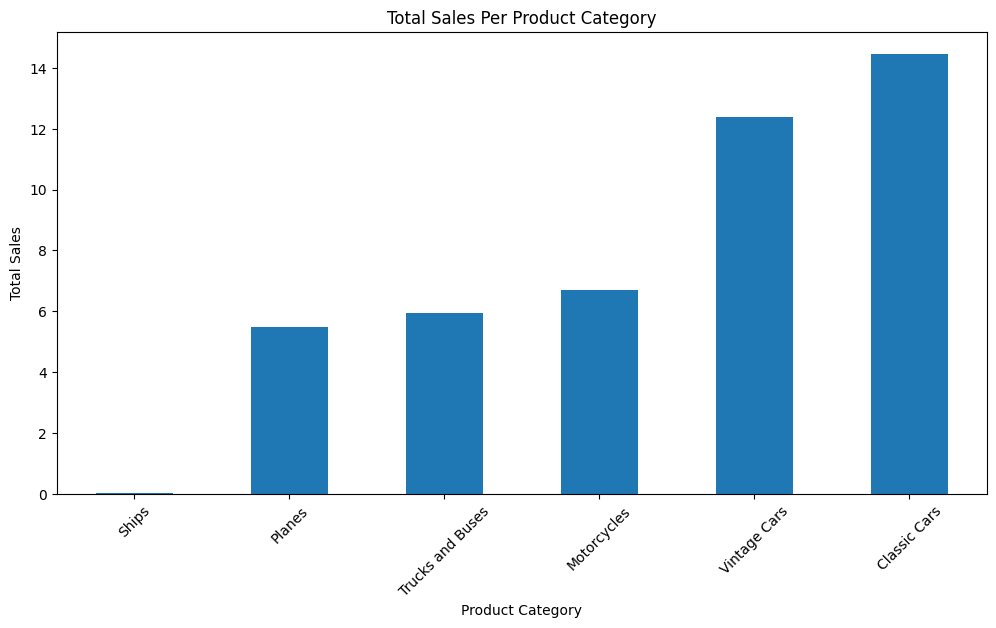

In [60]:
# Visualizations

# Sales by Product Category
plt.figure(figsize=(12, 6))
sales_df.groupby('PRODUCTLINE')['SALES'].sum().sort_values().plot(kind='bar')
plt.title('Total Sales Per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

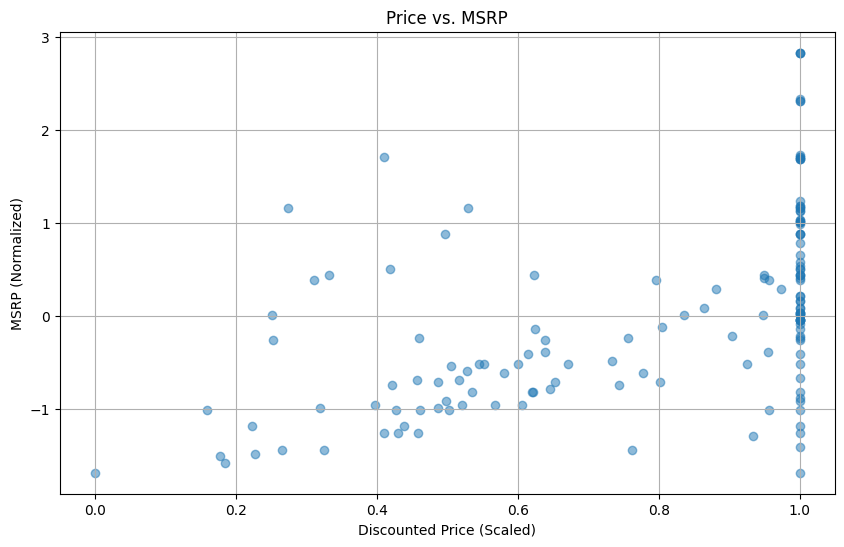

In [61]:
# Price vs. MSRP Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(sales_df['PRICEEACH'], sales_df['MSRP'], alpha=0.5)
plt.title('Price vs. MSRP')
plt.xlabel('Discounted Price (Scaled)')
plt.ylabel('MSRP (Normalized)')
plt.grid(True)
plt.show()

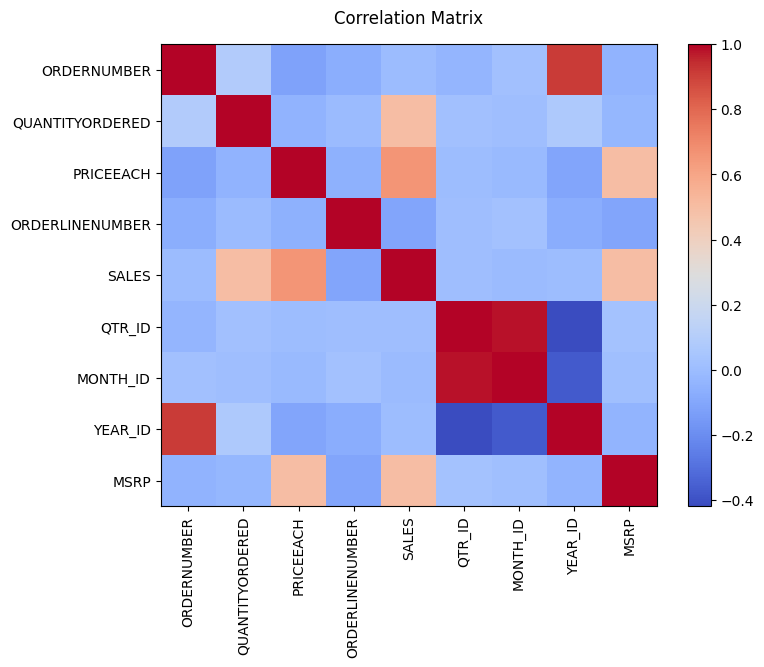

In [62]:
# Select only numerical columns for correlation
numeric_cols = sales_df.select_dtypes(include=[np.number])

# Drop columns that contain NaN after correlation calculation
correlation_matrix = numeric_cols.corr().dropna(axis=1, how='all').dropna(axis=0, how='all')

# Check if correlation_matrix is empty or has invalid values
if correlation_matrix.empty:
    print("Warning: Correlation matrix is empty or has invalid values. Skipping visualization.")
else:
    # Plot the correlation matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar()
    plt.title('Correlation Matrix', pad=15)
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()


<Figure size 1000x600 with 0 Axes>

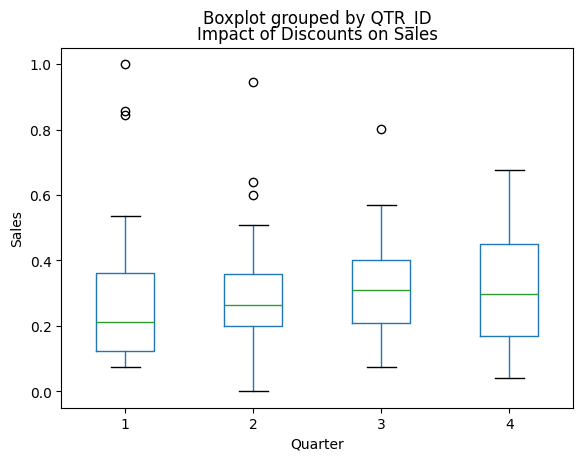

In [63]:
# Discount Impact on Sales (Boxplot)
plt.figure(figsize=(10, 6))
sales_df.boxplot(column='SALES', by='QTR_ID', grid=False)
plt.title('Impact of Discounts on Sales')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

In [64]:
# Save the Cleaned and Processed Dataset
sales_df.to_csv('cleaned_sales_data.csv', index=False)

print("\nData Cleaning, Scaling, and Visualizations Completed. The cleaned dataset has been saved.")



Data Cleaning, Scaling, and Visualizations Completed. The cleaned dataset has been saved.


        -- TASK 4 --

In [65]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [66]:
# Create a synthetic graph dataset
G = nx.Graph()

In [67]:
# Add nodes (entities)
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
G.add_nodes_from(nodes)

In [68]:
# Add edges (relationships)
edges = [
    ('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'),
    ('C', 'F'), ('D', 'G'), ('E', 'G'), ('F', 'G')
]
G.add_edges_from(edges)

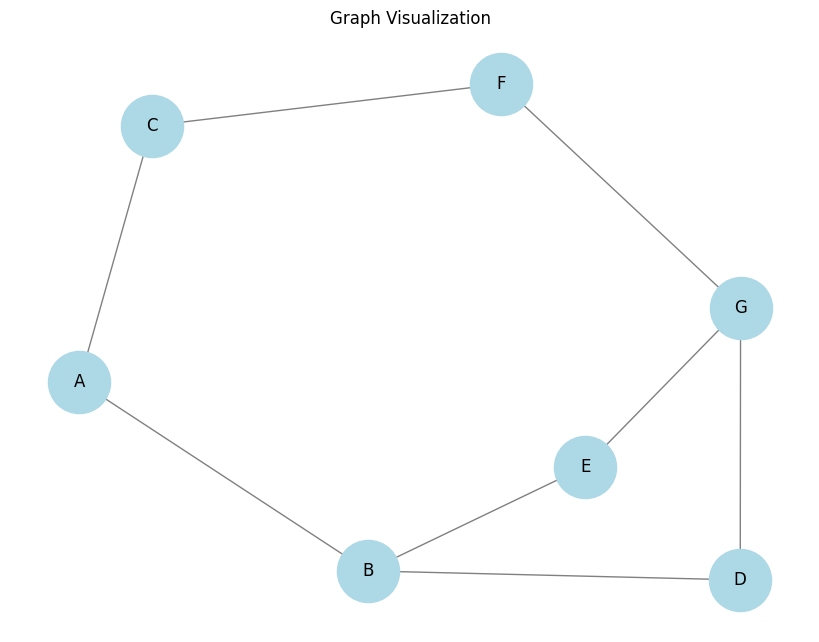

In [69]:
# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=12)
plt.title("Graph Visualization")
plt.show()

In [70]:
# Compute basic graph properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degree_of_nodes = dict(G.degree())
is_connected = nx.is_connected(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Degree of nodes: {degree_of_nodes}")
print(f"Is the graph connected? {'Yes' if is_connected else 'No'}")

Number of nodes: 7
Number of edges: 8
Degree of nodes: {'A': 2, 'B': 3, 'C': 2, 'D': 2, 'E': 2, 'F': 2, 'G': 3}
Is the graph connected? Yes


In [71]:
# Perform BFS Traversal
def bfs_traversal(graph, start_node):
    visited = []
    queue = [start_node]
    
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            queue.extend(set(graph.neighbors(node)) - set(visited))
    return visited

bfs_result = bfs_traversal(G, 'A')
print(f"BFS Traversal starting from A: {bfs_result}")

BFS Traversal starting from A: ['A', 'C', 'B', 'F', 'D', 'E', 'G']


In [72]:
# Perform DFS Traversal
def dfs_traversal(graph, start_node, visited=None):
    if visited is None:
        visited = []
    visited.append(start_node)
    
    for neighbor in graph.neighbors(start_node):
        if neighbor not in visited:
            dfs_traversal(graph, neighbor, visited)
    return visited

dfs_result = dfs_traversal(G, 'A')
print(f"DFS Traversal starting from A: {dfs_result}")

DFS Traversal starting from A: ['A', 'B', 'D', 'G', 'E', 'F', 'C']


In [73]:
# Compute the shortest path between two nodes
shortest_path = nx.shortest_path(G, source='A', target='G')
shortest_path_length = nx.shortest_path_length(G, source='A', target='G')

print(f"Shortest path from A to G: {shortest_path}")
print(f"Shortest path length from A to G: {shortest_path_length}")

Shortest path from A to G: ['A', 'B', 'D', 'G']
Shortest path length from A to G: 3


In [74]:
# Adding weights for demonstration
weighted_edges = [
    ('A', 'B', 2), ('A', 'C', 3), ('B', 'D', 1), ('B', 'E', 4),
    ('C', 'F', 2), ('D', 'G', 3), ('E', 'G', 2), ('F', 'G', 1)
]
G_weighted = nx.Graph()
G_weighted.add_weighted_edges_from(weighted_edges)

shortest_weighted_path = nx.dijkstra_path(G_weighted, source='A', target='G')
shortest_weighted_path_length = nx.dijkstra_path_length(G_weighted, source='A', target='G')

print(f"Dijkstra’s shortest path from A to G: {shortest_weighted_path}")
print(f"Dijkstra’s shortest path length from A to G: {shortest_weighted_path_length}")


Dijkstra’s shortest path from A to G: ['A', 'B', 'D', 'G']
Dijkstra’s shortest path length from A to G: 6
